# Avaliando diferentes modelos
- Vamos usar o dataset iris, bastante conhecido pra quem já trabalha com Machine Learning
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [1]:
import pandas as pd

In [2]:
# Importando o dataset iris
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
# Transformando em um DataFrame
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
iris = iris[iris.target != 0] # Excluindo target = 0 para trabalhar so com 1 e 2
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


### Separando os dados

In [4]:
X = iris.drop('target',axis=1)
y = iris.target

In [5]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Visualizando os dados

In [7]:
# Aqui eu estou concatenando a coluna target novamente apenas para visualizacao
X_view = pd.concat([X_train,y_train],axis=1)
X_view.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
105,7.6,3.0,6.6,2.1,2
138,6.0,3.0,4.8,1.8,2
76,6.8,2.8,4.8,1.4,1


C:\Users\leand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


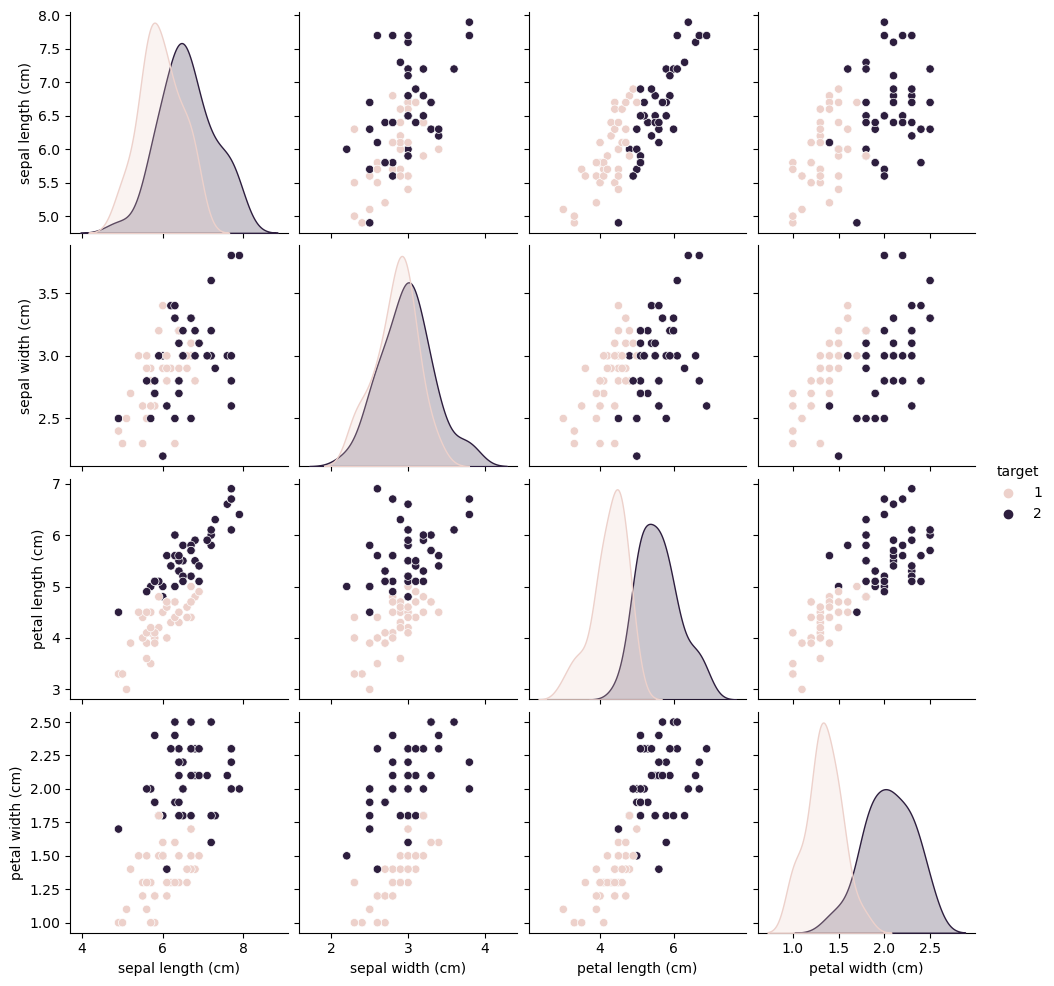

In [8]:
# Seaborn
import seaborn as sns
sns.pairplot(X_view,hue='target');

## Visualizando os dados escolhidos no matplotlib

#### Escolhemos petal width  e petal length pois estão mais separados e divididos

In [9]:
import matplotlib.pyplot as plt

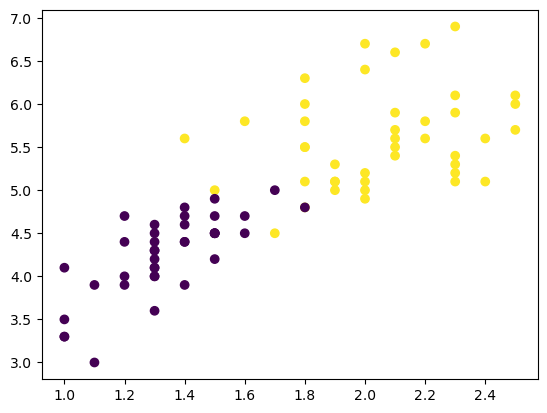

In [10]:
# plot
fig, ax = plt.subplots()

ax.scatter(X_train['petal width (cm)'], X_train['petal length (cm)'], c=y_train.values)

plt.show()

### Separando esses dados utilizando uma reta

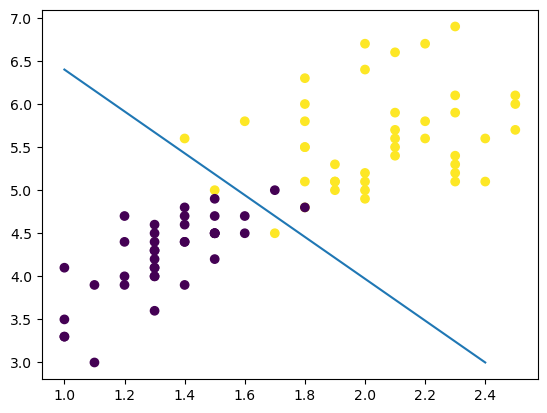

In [12]:
# plot
fig, ax = plt.subplots()

ax.scatter(X_train['petal width (cm)'], X_train['petal length (cm)'], c=y_train.values)

# Criar o plot de uma reta
x_reta = [2.4,1]
y_reta = [3,6.4]
ax.plot(x_reta,y_reta)

plt.show()

## Função de classificação com Equação da reta

y = ax + b

  x  y
(2.4,3) -> 3=a.2.4 + b

(1,6.4) -> 6.4=a.1+b


3-6.4=(2.4-1).a
-3.4=1.4.a

a=-3.4/1.4

a=-1.7/0.7


3-a.2.4=b

b=3-2.4a

In [14]:
a=-1.7/0.7
b=3-2.4*a

def clf_reta(x,y):
    y_modelo=a*x+b
    
    # Se y_ponto > y_funcao: class 2
    if y >= y_modelo:
        return 2
    # Se y_ponto < y_funcao: class 1
    elif y < y_modelo:
        return 1

## Função de classificação com árvore de decisão

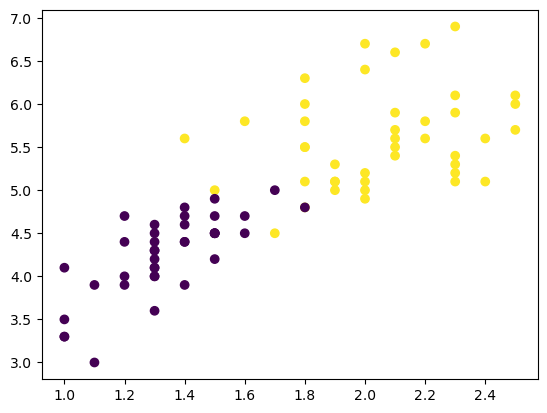

In [20]:
# plot
fig, ax = plt.subplots()

ax.scatter(X_train['petal width (cm)'], X_train['petal length (cm)'], c=y_train.values)


plt.show()

### Para construir a arvore,  posso definir limites e para ver o comportamento dos pontos

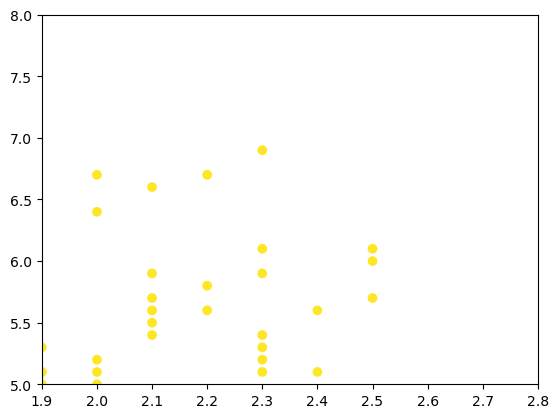

In [31]:
# plot
fig, ax = plt.subplots()

ax.scatter(X_train['petal width (cm)'], X_train['petal length (cm)'], c=y_train.values)

# Se 'petal width (cm)' >= 1.9 -> class:2
# Se X > 1.9 = Cassificação 2
ax.set(xlim=(1.9,2.8),ylim=(5, 8))

plt.show()

### Construindo a arvore

### Verificando outro ponto
#### 'petal length (cm)' <= 5 e 'petal width (cm)' entre 1.3 e 1.9 -> class: 1

 Não queremos acertar tudo e sim a maioria

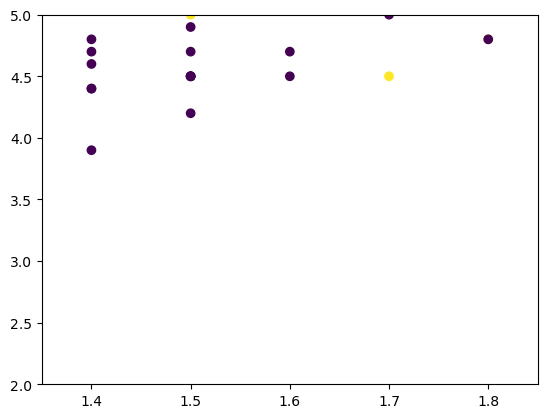

In [39]:
fig, ax = plt.subplots()
ax.scatter(X_train['petal width (cm)'], X_train['petal length (cm)'], c=y_train.values)
ax.set(xlim=(1.35,1.85),ylim=(2, 5))
plt.show()

### Definindo essa função (Arvore de decisão)

In [33]:
def clf_arvore(x,y):
    if x >= 1.9:
        return 2
    elif x <= 1.3:
        return 1
    elif y <= 5:
        return 1
    elif y > 5:
        return 2

# Avaliando o modelo
##### Treino =   Obter as funções (equação e  arvore). Por isso, não vamos avaliar sobre os dados do treino.
##### Teste =  Avaliar o modelo criado

In [42]:
# Dados de teste dos dois modelos
y_modelo_reta_teste = X_test.apply(lambda x:clf_reta(x['petal width (cm)'],x['petal length (cm)']),axis=1)
y_modelo_arvore_teste = X_test.apply(lambda x:clf_arvore(x['petal width (cm)'],x['petal length (cm)']),axis=1)

## Matriz de confusão (confusion matrix)

In [43]:
# Reta
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_modelo_reta_teste)

array([[11,  1],
       [ 1,  7]], dtype=int64)

In [44]:
# Arvore                                                 
confusion_matrix(y_test, y_modelo_arvore_teste)

array([[11,  1],
       [ 3,  5]], dtype=int64)

## Acurácia

In [45]:
# Reta
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_modelo_reta_teste)

0.9

In [46]:
# Arvore
accuracy_score(y_test, y_modelo_arvore_teste)

0.8

# Precisão
### pos_label=2 -> Precisamos ajustar o que é positivo, no nosso caso, o positivo sera o 2

In [47]:
# Reta
from sklearn.metrics import precision_score
precision_score(y_test, y_modelo_reta_teste,pos_label=2)

0.875

In [48]:
# Arvore
precision_score(y_test, y_modelo_arvore_teste,pos_label=2)

0.8333333333333334

## Recall

In [49]:
# Reta
from sklearn.metrics import recall_score
recall_score(y_test, y_modelo_reta_teste,pos_label=2)

0.875

In [50]:
# Arvore
recall_score(y_test, y_modelo_arvore_teste,pos_label=2)

0.625